# EDA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# train
train = pd.read_csv("C:\\Users\\xianm\\Downloads\\HB\\Train_annotations.csv")
test = pd.read_csv("C:\\Users\\xianm\\Downloads\\HB\\Test_annotations.csv")
df = pd.concat([train, test], ignore_index=True)

LABEL에 따른 이미지개수

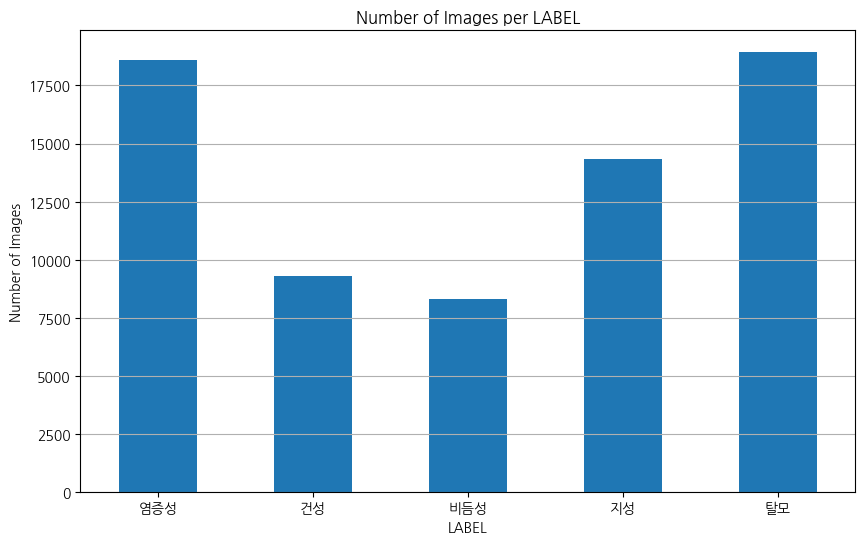

In [18]:
# 한글폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# LABEL에 따른 이미지 개수
label_counts = df['LABEL'].value_counts().sort_index()

# 라벨 이름 설정
label_names = {
    0: "염증성",
    1: "건성",
    2: "비듬성",
    3: "지성",
    4: "탈모"
}

# 시각화
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Number of Images per LABEL')
plt.xlabel('LABEL')
plt.ylabel('Number of Images')
plt.xticks(range(len(label_counts)), [label_names[label] for label in label_counts.index], rotation=0)
plt.grid(axis='y')
plt.show()


같은 LABEL에 대해 LEVEL에 따른 이미지의 개수

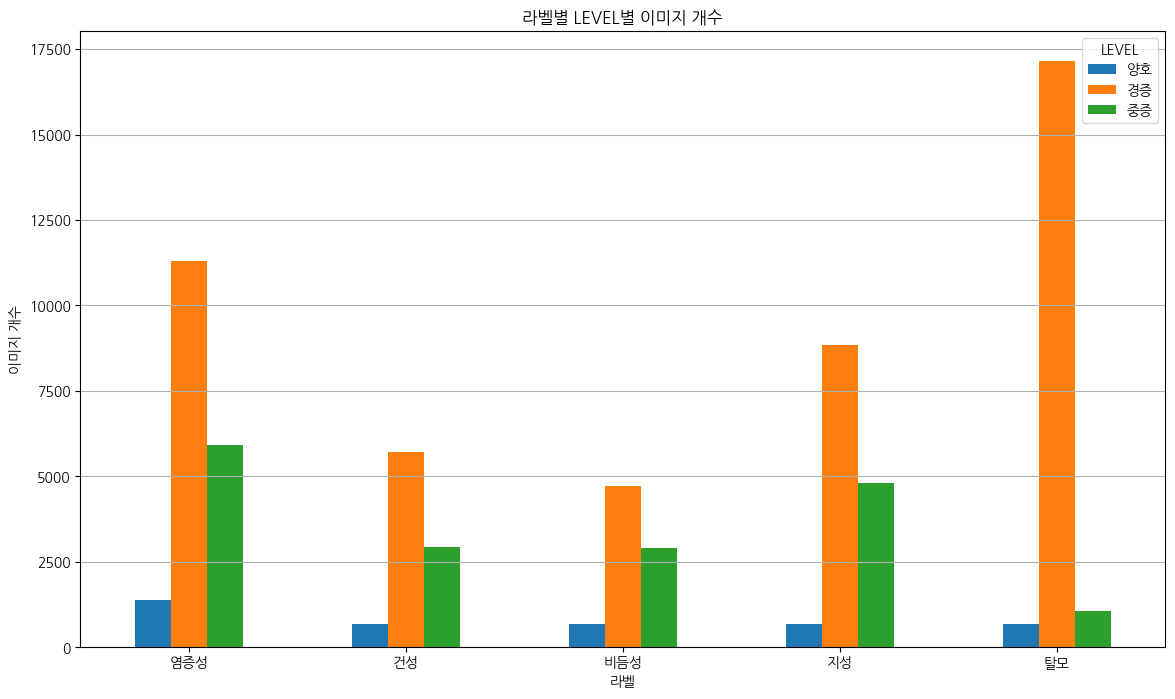

In [19]:
# LEVEL 이름 설정
level_names = {
    0: "양호",
    1: "경증",
    2: "중증"
}

# 같은 LABEL 내에서 LEVEL에 따른 이미지 개수
grouped = df.groupby('LABEL')['LEVEL'].value_counts().unstack(fill_value=0)

# LEVEL 이름 확인 후 딕셔너리에 추가
for level in grouped.columns:
    if level not in level_names:
        level_names[level] = str(level)

# 시각화
grouped.plot(kind='bar', figsize=(14, 8))
plt.title('라벨별 LEVEL별 이미지 개수')
plt.xlabel('라벨')
plt.ylabel('이미지 개수')
plt.xticks(range(len(label_counts)), [label_names[label] for label in label_counts.index], rotation=0)

# LEVEL 이름 한글로 변경
plt.legend(title='LEVEL', labels=[level_names[level] for level in grouped.columns])
plt.grid(axis='y')
plt.show()



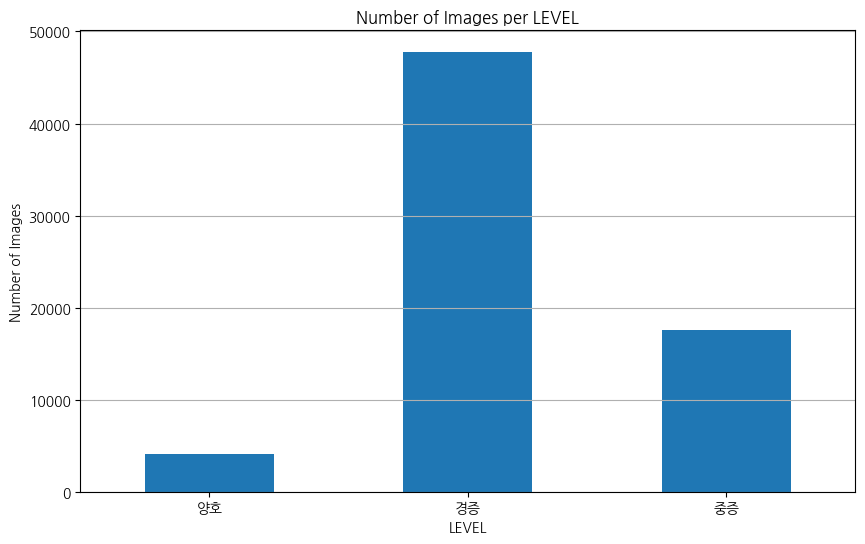

In [21]:
# LEVEL에 따른 이미지 개수
level_counts = df['LEVEL'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar')
plt.title('Number of Images per LEVEL')
plt.xlabel('LEVEL')
plt.ylabel('Number of Images')
# plt.xticks(rotation=0)
plt.xticks(range(len(level_counts)), [level_names[level] for level in level_counts.index], rotation=0)
plt.grid(axis='y')
plt.show()
